In [1]:
import matplotlib.pyplot as plt
import numpy as np

from upsampling.data_reuse import *

# Latency and Energy Consumption for Deconvolution Algorithms

**Time** - latency vs. throughput

**Energy** - energy consumption vs. energy efficiency

In [2]:
height = width = 1024
num_channels = 3
kernel_size = 3

# Using NVIDIA GTX 680 from Choi et al. (2013) - A Roofline Model of Energy
e_flop = 43.2  * 1e-12 # J / flop
e_mem = 437.5 * 1e-12 # J / byte
pi_0 = 66.37 # watts

t_flop = 1. / (1e9 * 3532.8) # s / flop
t_mem = 1. / (1e9 * 192.2) # s / byte

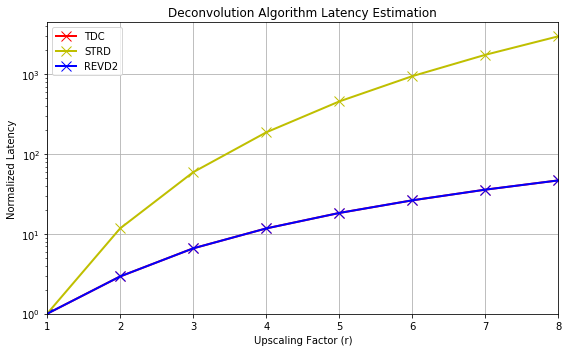

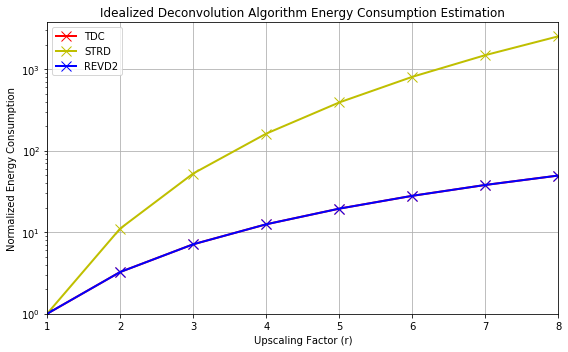

In [3]:
latency_measurements = np.zeros((3, 9)) # microseconds
energy_consumption = np.zeros((3, 9)) # millijoules

for upscaling_factor in np.arange(1, 9):
    macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[0, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[0, upscaling_factor] = 1e3 * E # millijoules
    
    macs, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[1, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[1, upscaling_factor] = 1e3 * E # millijoules

    macs, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[2, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[2, upscaling_factor] = 1e3 * E # millijoules

x  = np.arange(1, 9)
Tb = latency_measurements[0,1]
Eb = energy_consumption[0,1]
    
plt.figure(figsize=(8,5))
plt.plot(x, latency_measurements[2, 1:] / Tb, label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[1, 1:] / Tb, label="STRD", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[0, 1:] / Tb, label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Normalized Latency")
plt.title("Deconvolution Algorithm Latency Estimation")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-time-consumption-D-SP-NVIDIA-GTX-680.png")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x, energy_consumption[2, 1:] / Eb, label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[1, 1:] / Eb, label="STRD", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[0, 1:] / Eb, label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Normalized Energy Consumption")
plt.title("Idealized Deconvolution Algorithm Energy Consumption Estimation")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-energy-consumption-D-SP-NVIDIA-GTX-680.png")
plt.show()

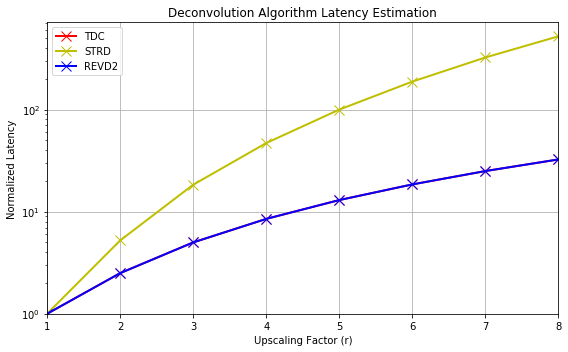

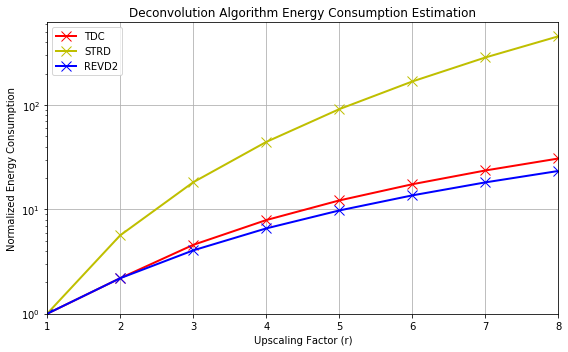

In [4]:
latency_measurements = np.zeros((3, 9)) # microseconds
energy_consumption = np.zeros((3, 9)) # millijoules

for upscaling_factor in np.arange(1, 9):
    macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[0, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[0, upscaling_factor] = 1e3 * E # millijoules
    
    macs, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[1, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[1, upscaling_factor] = 1e3 * E # millijoules

    macs, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[2, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[2, upscaling_factor] = 1e3 * E # millijoules

x  = np.arange(1, 9)
Tb = latency_measurements[0,1]
Eb = energy_consumption[0,1]
    
plt.figure(figsize=(8,5))
plt.plot(x, latency_measurements[2, 1:] / Tb, label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[1, 1:] / Tb, label="STRD", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[0, 1:] / Tb, label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Normalized Latency")
plt.title("Deconvolution Algorithm Latency Estimation")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-time-consumption-D-NN-NVIDIA-GTX-680.png")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x, energy_consumption[2, 1:] / Eb, label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[1, 1:] / Eb, label="STRD", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[0, 1:] / Eb, label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Normalized Energy Consumption")
plt.title("Deconvolution Algorithm Energy Consumption Estimation")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-energy-consumption-D-NN-NVIDIA-GTX-680.png")
plt.show()

# Data Reuse Patterns for Deconvolution Algorithms

understanding data reuse for each of these deconvolution algorithms

we are only interested in computations contributing to the pixel calculations - not counting zeros inserted into input space or kernel space

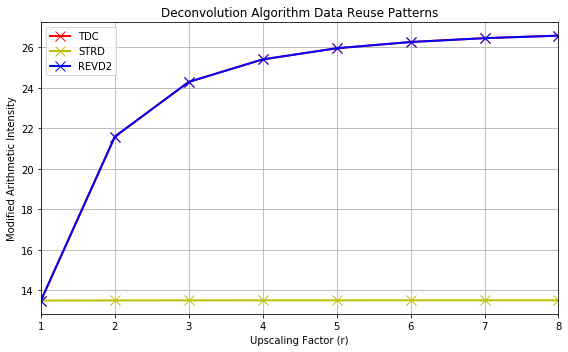

In [5]:
data_reuse = np.zeros((3, 9)) # ops / byte

for upscaling_factor in np.arange(1, 9):
    
    macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    data_reuse[0, upscaling_factor] = macs / activations
    
    true_macs = macs
    
    _, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    data_reuse[1, upscaling_factor] = macs / activations

    _, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    data_reuse[2, upscaling_factor] = macs / activations

x  = np.arange(1, 9)
    
plt.figure(figsize=(8,5))
plt.plot(x, data_reuse[2, 1:], label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[1, 1:], label="STRD", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[0, 1:], label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
# plt.axhline(Be, linestyle="--", color="k")
# plt.axhline(Bt, linestyle="--", color="k")
plt.legend(loc="best")
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Modified Arithmetic Intensity")
plt.title("Deconvolution Algorithm Data Reuse Patterns")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-data_reuse-D-SP.png")
plt.show()

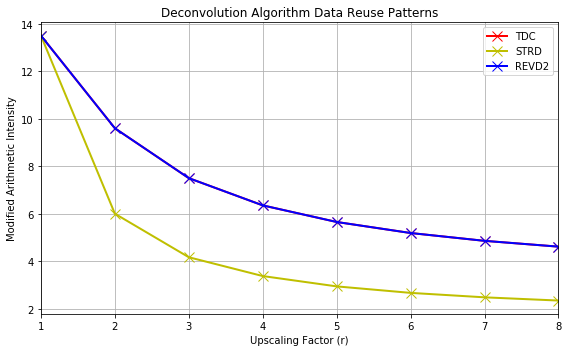

In [6]:
data_reuse = np.zeros((3, 9)) # ops / byte

for upscaling_factor in np.arange(1, 9):
    
    macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[0, upscaling_factor] = macs / activations
    
    true_macs = macs
    
    _, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[1, upscaling_factor] = macs / activations

    _, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[2, upscaling_factor] = macs / activations

x  = np.arange(1, 9)
    
plt.figure(figsize=(8,5))
plt.plot(x, data_reuse[2, 1:], label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[1, 1:], label="STRD", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[0, 1:], label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
# plt.axhline(Be, linestyle="--", color="k")
# plt.axhline(Bt, linestyle="--", color="k")
# plt.text(7, Be + 0.6, r"$B_\epsilon$", size=14)
# plt.text(7, Bt + 0.6, r"$B_\tau$", size=14)
plt.legend(loc="best")
plt.xlim(1,8)
# plt.ylim(0,20)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Modified Arithmetic Intensity")
plt.title("Deconvolution Algorithm Data Reuse Patterns")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-data_reuse-D-NN.png")
plt.show()

# Latency and Energy Consumption for Convolution-based Upscaling Operators

comparing operators now that we know that we should be using the REVD algorithm

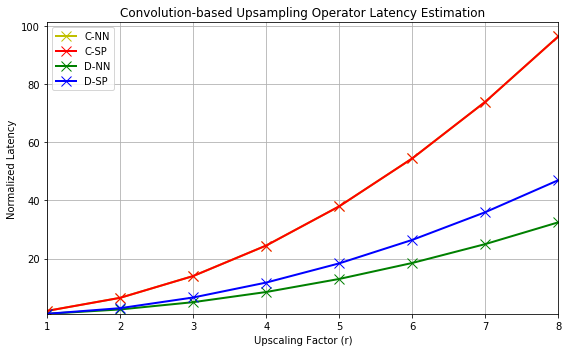

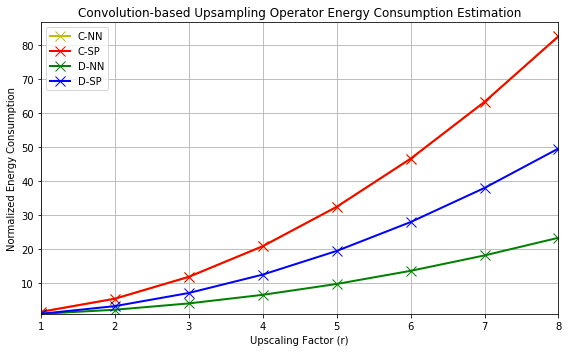

In [7]:
latency_measurements = np.zeros((4, 9)) # microseconds
energy_consumption = np.zeros((4, 9)) # millijoules

for upscaling_factor in np.arange(1, 9):
    macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[0, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[0, upscaling_factor] = 1e3 * E # millijoules

    macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[1, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[1, upscaling_factor] = 1e3 * E # millijoules
    
    macs, weights, activations = sub_pixel_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[2, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[2, upscaling_factor] = 1e3 * E # millijoules

    macs, weights, activations = NN_resize_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[3, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[3, upscaling_factor] = 1e3 * E # millijoules

x  = np.arange(1, 9)
Tb = latency_measurements[0,1]
Eb = energy_consumption[0,1]
    
plt.figure(figsize=(8,5))
plt.plot(x, latency_measurements[3, 1:] / Tb, label="C-NN", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[2, 1:] / Tb, label="C-SP", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[1, 1:] / Tb, label="D-NN", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[0, 1:] / Tb, label="D-SP", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
# plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Normalized Latency")
plt.title("Convolution-based Upsampling Operator Latency Estimation")
plt.tight_layout()
plt.savefig("../figures/data_reuse/conv-upsample-ops-time-consumption-NVIDIA-GTX-680.png")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x, energy_consumption[3, 1:] / Eb, label="C-NN", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[2, 1:] / Eb, label="C-SP", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[1, 1:] / Eb, label="D-NN", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[0, 1:] / Eb, label="D-SP", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
# plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Normalized Energy Consumption")
plt.title("Convolution-based Upsampling Operator Energy Consumption Estimation")
plt.tight_layout()
plt.savefig("../figures/data_reuse/conv-upsample-ops-energy-consumption-NVIDIA-GTX-680.png")
plt.show()

# Data Reuse Patterns for Convolution-based Upsampling

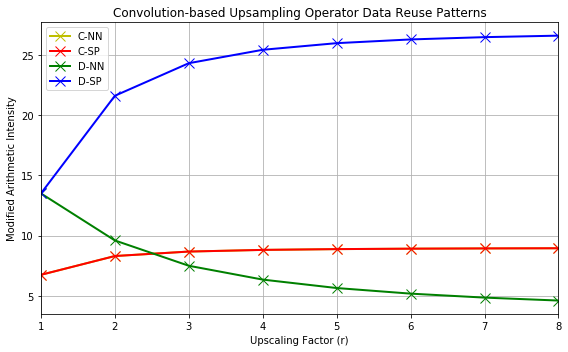

In [8]:
data_reuse = np.zeros((4, 9)) # ops / byte

for upscaling_factor in np.arange(1, 9):
    
    macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    data_reuse[0, upscaling_factor] = macs / activations

    macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[1, upscaling_factor] = macs / activations
    
    macs, _, activations = sub_pixel_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    data_reuse[2, upscaling_factor] = macs / activations

    macs, _, activations = NN_resize_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    data_reuse[3, upscaling_factor] = macs / activations

x  = np.arange(1, 9)
    
plt.figure(figsize=(8,5))
plt.plot(x, data_reuse[3, 1:], label="C-NN", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[2, 1:], label="C-SP", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[1, 1:], label="D-NN", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[0, 1:], label="D-SP", color="b", linewidth=2, marker='x', markersize=10)
# plt.axhline(Be, linestyle="--", color="k")
# plt.axhline(Bt, linestyle="--", color="k")
# plt.text(7, Be + 0.6, r"$B_\epsilon$", size=14)
# plt.text(7, Bt + 0.6, r"$B_\tau$", size=14)
plt.legend(loc="best")
plt.xlim(1,8)
# plt.ylim(0,20)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Modified Arithmetic Intensity")
plt.title("Convolution-based Upsampling Operator Data Reuse Patterns")
plt.tight_layout()
plt.savefig("../figures/data_reuse/conv-upsample-ops-data_reuse.png")
plt.show()

# roofline models of time & energy

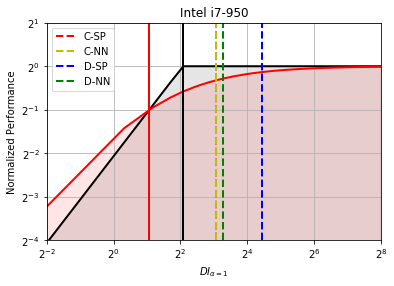

In [9]:
# CPU: Intel Core i7-950 (Nehalem)

r = 2
H = 1024
K = 3
C = 3

Bt = 4.2 # 32-bit
Be = 2.1 # 32-bit

I = np.arange(0.25, 256)
T = np.minimum(1, I/Bt) # time throughput model
E = 1 / (1 + (Be / I))

plt.figure()

plt.plot(I, T, linewidth=2, color='k')
plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='r')
plt.fill_between(I, 0, E, color='r', alpha=0.1)

plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='r')

macs, _, activations = sub_pixel_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="C-SP")
macs, _, activations = NN_resize_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='y', label="C-NN")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="D-SP")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="D-NN")

plt.legend(loc='best')

plt.title("Intel i7-950")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"$DI_{\alpha=1}$")
plt.savefig("../figures/data_reuse/conv-upsample-ops-roofline-i7-950.png")
plt.show()

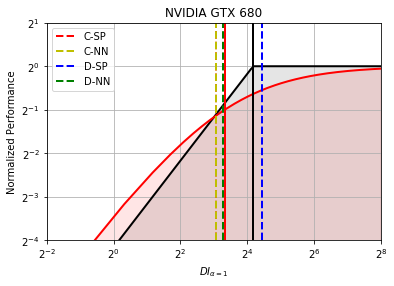

In [10]:
# GPU: NVIDIA GTX 680

Bt = 18 # 32-bit
Be = 10 # 32-bit

I = np.arange(0.25, 256)
T = np.minimum(1, I/Bt) # time throughput model
E = 1 / (1 + (Be / I))

plt.figure()

plt.plot(I, T, linewidth=2, color='k')
plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='r')
plt.fill_between(I, 0, E, color='r', alpha=0.1)

plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='r')

macs, _, activations = sub_pixel_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="C-SP")
macs, _, activations = NN_resize_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='y', label="C-NN")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="D-SP")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="D-NN")
plt.legend(loc='best')

plt.title("NVIDIA GTX 680")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"$DI_{\alpha=1}$")
plt.savefig("../figures/data_reuse/conv-upsample-ops-roofline-GTX-680.png")
plt.show()

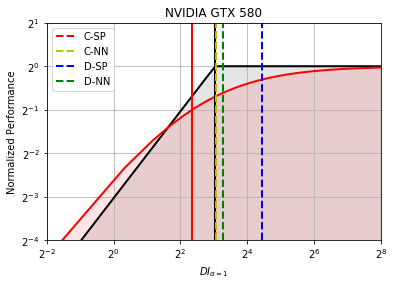

In [11]:
# GPU: NVIDIA GTX 580

Bt = 8.2 # 32-bit
Be = 5.1 # 32-bit

I = np.arange(0.25, 256)
T = np.minimum(1, I/Bt) # time throughput model
E = 1 / (1 + (Be / I))

plt.figure()

plt.plot(I, T, linewidth=2, color='k')
plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='r')
plt.fill_between(I, 0, E, color='r', alpha=0.1)

plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='r')

macs, _, activations = sub_pixel_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="C-SP")
macs, _, activations = NN_resize_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='y', label="C-NN")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="D-SP")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="D-NN")

plt.legend(loc='best')

plt.title("NVIDIA GTX 580")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"$DI_{\alpha=1}$")
plt.savefig("../figures/data_reuse/conv-upsample-ops-roofline-GTX-580.png")
plt.show()